In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   u          320000 non-null  float64
 1   g          320000 non-null  float64
 2   r          320000 non-null  float64
 3   i          320000 non-null  float64
 4   z          320000 non-null  float64
 5   redshift   320000 non-null  float64
 6   dered_u    320000 non-null  float64
 7   dered_g    320000 non-null  float64
 8   dered_r    320000 non-null  float64
 9   dered_i    320000 non-null  float64
 10  dered_z    320000 non-null  float64
 11  nObserve   320000 non-null  int64  
 12  nDetect    320000 non-null  int64  
 13  airmass_u  320000 non-null  float64
 14  airmass_g  320000 non-null  float64
 15  airmass_r  320000 non-null  float64
 16  airmass_i  320000 non-null  float64
 17  airmass_z  320000 non-null  float64
 18  class      320000 non-null  int64  
dtypes: float64(16), int64(3

In [4]:
train.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000
mean,19.852429,18.376837,17.735761,17.174226,16.875187,0.058308,19.628874,18.227087,17.615434,17.152347,16.869277,6.332700,6.138816,1.175763,1.176528,1.175131,1.175430,1.176128,1.116322
std,1.945548,31.110759,1.466242,52.561464,57.146264,0.575457,1.923586,17.786568,1.473020,25.075760,35.436549,8.881129,8.551634,0.116297,0.118065,0.114723,0.115485,0.117156,0.923455
min,-17.687512,-17555.365606,7.731354,-23955.817764,-23955.817764,-166.048260,-42.837530,-9999.000000,-16.380230,-9999.000000,-9999.000000,1.000000,1.000000,1.000059,1.000012,1.000157,1.000105,1.000027,0.000000
25%,18.724150,17.474851,16.877190,16.523876,16.288890,0.000036,18.563598,17.348370,16.787138,16.453048,16.234063,1.000000,1.000000,1.088220,1.088448,1.087763,1.088021,1.088299,0.000000
50%,19.419439,18.140528,17.525850,17.149736,16.917610,0.047129,19.264635,18.022410,17.443415,17.087370,16.869390,2.000000,2.000000,1.179350,1.179235,1.179375,1.179377,1.179303,1.000000
75%,20.432092,19.073172,18.428089,18.007435,17.728924,0.094597,20.197603,18.888443,18.291078,17.906960,17.655653,5.000000,5.000000,1.227540,1.225990,1.229236,1.228599,1.226757,2.000000
max,58.623328,46.338272,72.009662,50.164052,52.612664,62.323343,30.777850,30.613170,31.957200,32.016220,30.781270,44.000000,42.000000,2.050775,2.080287,2.022134,2.036329,2.065390,2.000000


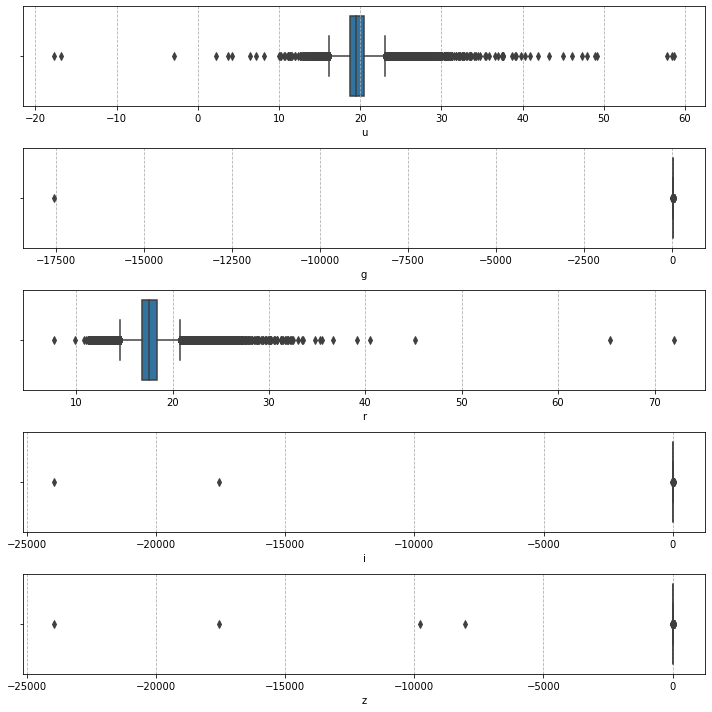

In [5]:
fig, axes = plt.subplots(5, 1, figsize=(10,10))
columns = train.columns.tolist()[:5]
for i, column in enumerate(columns):
    sns.boxplot(x = column, data=train, ax=axes.flat[i])
    axes.flat[i].grid(axis='x', linestyle='--')
    
fig.tight_layout()
plt.show()

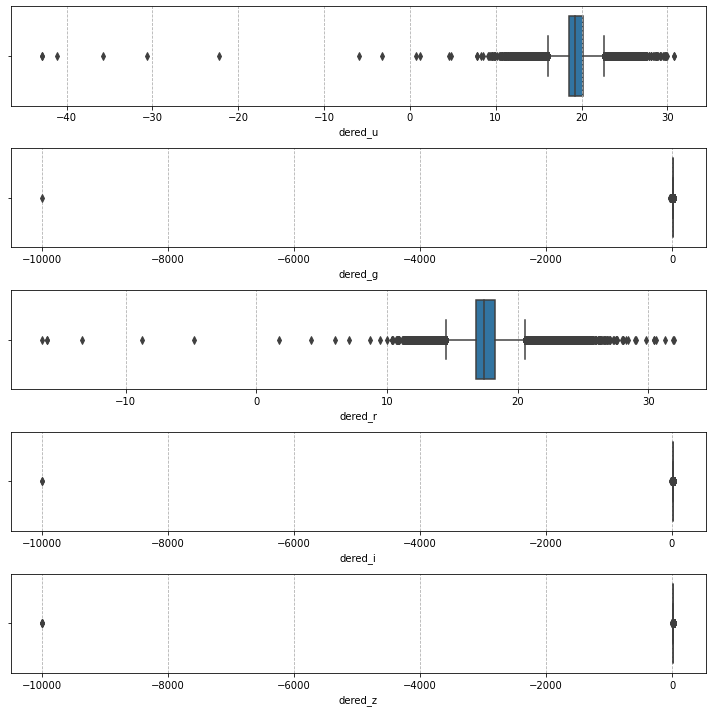

In [6]:
fig, axes = plt.subplots(5, 1, figsize=(10,10))
columns = train.columns.tolist()[6:11]
for i, column in enumerate(columns):
    sns.boxplot(x = column, data=train, ax=axes.flat[i])
    axes.flat[i].grid(axis='x', linestyle='--')
    
fig.tight_layout()
plt.show()

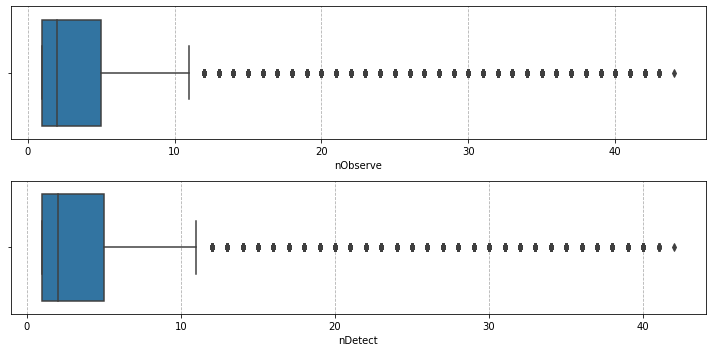

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(10,5))
columns = train.columns.tolist()[11:13]
for i, column in enumerate(columns):
    sns.boxplot(x = column, data=train, ax=axes.flat[i])
    axes.flat[i].grid(axis='x', linestyle='--')
    
fig.tight_layout()
plt.show()

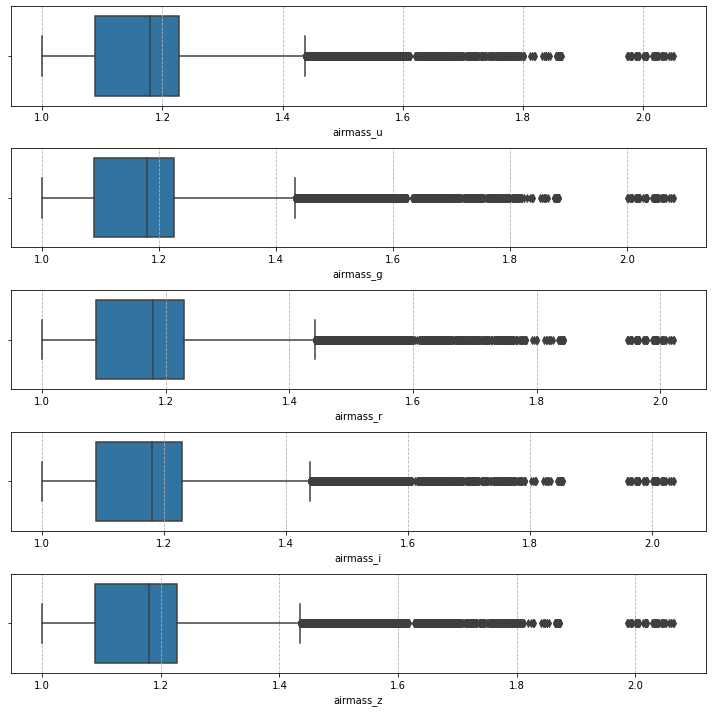

In [8]:
fig, axes = plt.subplots(5, 1, figsize=(10,10))
columns = train.columns.tolist()[13:18]
for i, column in enumerate(columns):
    sns.boxplot(x = column, data=train, ax=axes.flat[i])
    axes.flat[i].grid(axis='x', linestyle='--')
    
fig.tight_layout()
plt.show()

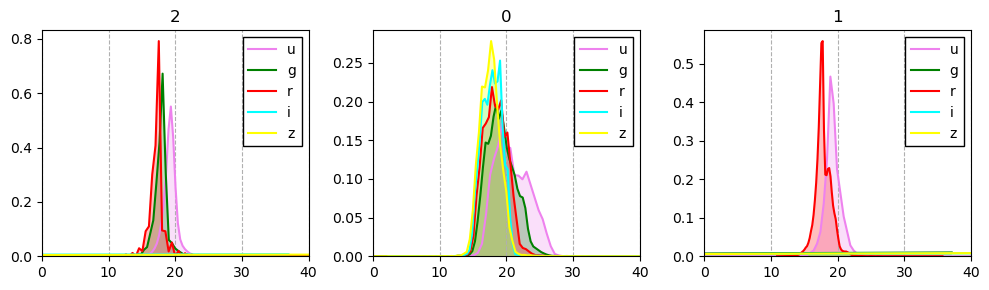

In [9]:
labels = train['class'].value_counts().index.tolist()
columns = train.columns.tolist()[:5]

colors = ['violet', 'green', 'red', 'cyan', 'yellow']
waves = [column for column in columns]

fig, axes = plt.subplots(1, 3, figsize=(10,3), dpi=100)
w = 1.5
for i, label in enumerate(labels):
    for column, color, wave in zip(columns, colors, waves):
        q1 = train.loc[train['class'] == label, column].quantile(0.25)
        q3 = train.loc[train['class'] == label, column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (w * iqr)
        upper_bound = q3 + (w * iqr)
        mask =(train.loc[train['class'] == label, column] >= lower_bound) \
                    <= upper_bound
        data = train.loc[train['class'] == label, column].loc[mask]

        sns.distplot(data, hist=False, color=color, kde_kws={'shade': True}, 
                     label=wave, ax=axes.flat[i])

    axes.flat[i].set_title(label)
    axes.flat[i].set_xlabel('')
    axes.flat[i].set_xlim(xmin=0,xmax=40)
    axes.flat[i].grid(axis='x', linestyle='--')
    axes.flat[i].legend(frameon=True, framealpha=1, shadow=False, 
                        fancybox=False, edgecolor='black')

fig.tight_layout()
plt.show()

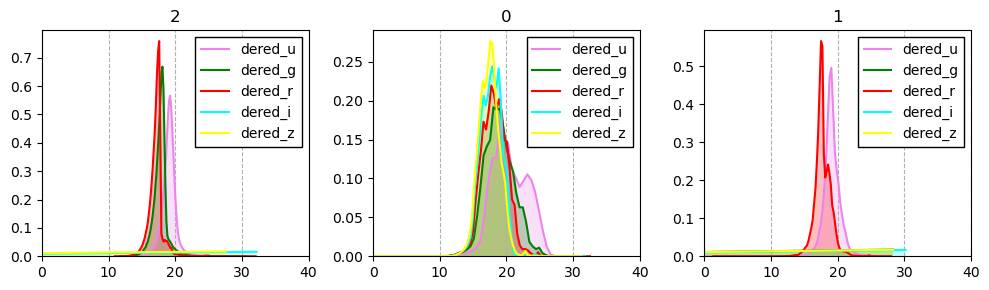

In [10]:
labels = train['class'].value_counts().index.tolist()
columns = train.columns.tolist()[6:11]

colors = ['violet', 'green', 'red', 'cyan', 'yellow']
waves = [column for column in columns]

fig, axes = plt.subplots(1, 3, figsize=(10,3), dpi=100)
w = 1.5
for i, label in enumerate(labels):
    for column, color, wave in zip(columns, colors, waves):
        q1 = train.loc[train['class'] == label, column].quantile(0.25)
        q3 = train.loc[train['class'] == label, column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (w * iqr)
        upper_bound = q3 + (w * iqr)
        mask =(train.loc[train['class'] == label, column] >= lower_bound) \
                    <= upper_bound
        data = train.loc[train['class'] == label, column].loc[mask]

        sns.distplot(data, hist=False, color=color, kde_kws={'shade': True}, 
                     label=wave, ax=axes.flat[i])

    axes.flat[i].set_title(label)
    axes.flat[i].set_xlabel('')
    axes.flat[i].set_xlim(xmin=0,xmax=40)
    axes.flat[i].grid(axis='x', linestyle='--')
    axes.flat[i].legend(frameon=True, framealpha=1, shadow=False, 
                        fancybox=False, edgecolor='black')

fig.tight_layout()
plt.show()

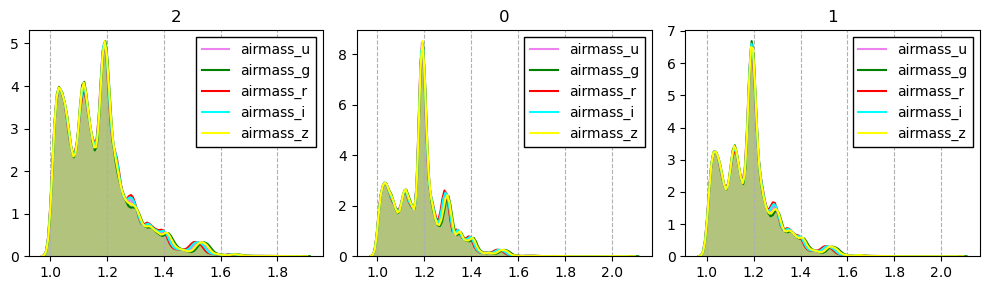

In [11]:
labels = train['class'].value_counts().index.tolist()
columns = train.columns.tolist()[13:18]

colors = ['violet', 'green', 'red', 'cyan', 'yellow']
waves = [column for column in columns]

fig, axes = plt.subplots(1, 3, figsize=(10,3), dpi=100)
w = 1.5
for i, label in enumerate(labels):
    for column, color, wave in zip(columns, colors, waves):
        q1 = train.loc[train['class'] == label, column].quantile(0.25)
        q3 = train.loc[train['class'] == label, column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (w * iqr)
        upper_bound = q3 + (w * iqr)
        mask =(train.loc[train['class'] == label, column] >= lower_bound) \
                    <= upper_bound
        data = train.loc[train['class'] == label, column].loc[mask]

        sns.distplot(data, hist=False, color=color, kde_kws={'shade': True}, 
                     label=wave, ax=axes.flat[i])

    axes.flat[i].set_title(label)
    axes.flat[i].set_xlabel('')
    axes.flat[i].grid(axis='x', linestyle='--')
    axes.flat[i].legend(frameon=True, framealpha=1, shadow=False, 
                        fancybox=False, edgecolor='black')

fig.tight_layout()
plt.show()

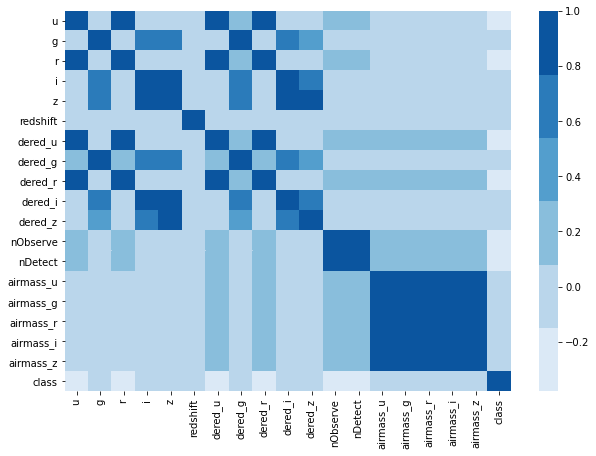

In [12]:
# 전체 데이터에 대한 상관관계 HeatMap 시각화
corr = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

# 데이터 분석 결과
---
1. dered_u(g, r, i, z)와 u(g, r, i, z)는 각각 비슷한 데이터값과 분포를 가진다.
2. airmass끼리 비슷한 데이터 값과 분포를 가진다.